<center>
#CSCI-P556: Applied Machine Learning
#Fall 2018
#Assignment #2
</center>
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: <!-- Your answers goes here -->
The only difference i could observe was the number of observations <br>
The 1st set train_1/valid_1 have 6770/1695 number of observation <br>
The 2nd set train_2/valid_2 have 28935/7235 number of observations <br>
Both the sets follow the 80/20 rule but the number of observations in set2 is "4" times that of set1 <br>
Intuition : Since the data in set2 is more than that of set1, we be asssume that the accuracy of set2 will be higher than that of set1

### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Answer for bullet one <br>
     Continuous values : age, balance, duration, campaign, pdays ,previous <br>
     For all the continuous data, the data was normalized 
2.   Answer for bullet two <br>
     Categorical Features: job, marital, education, default, housing, loan, contact, day, month, poutcome,y. <br>
     For all the categorical data I did one-hot encoding(Converting the different categories into binaries)
3.   Answer for bullet three <br>
     Yes, some of the features have missing data, the missing features are given as unknown in the data such as <br>
     job,education,contact and poutcome <br>
     or -1 in pdays <br>
     since the amount of missing data is very large in pdays and poutcome (around 70-80%) I have decided to drop the two column      <br>
     For the other columns thinking of finding the mode and replacing the unknown values


In [1]:
# PROBLEM 1, TASK 1 CODE GOES HERE
#continuous : age, balance, duration, campaign, pdays ,previous
#categorical : job, marital, education, default, housing, loan, contact, day, month, poutcome,y

### have to consider days as categorical not fone that yet
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


def transformData(dataset):

   
    contData = dataset.select_dtypes(include=['int64'])
    contData= contData.drop(['day'], axis=1)
    contData= contData.drop(['pdays'], axis=1)
  
    mean = contData- contData.mean()
    #SD = contData.max()-contData.min()
    SD= contData.std()
    contData_norm= mean/SD
    
    catData = (dataset.select_dtypes(include=['object']) )
    y = catData['y']
    del catData['y']
    del catData['poutcome']
    sid = dataset[['day']].copy() #pd.concat([catData,dataset['day']])
    bins = [1, 6, 11, 16, 21, 26,31]
    sid = (pd.cut(sid['day'],bins))
    
    catData = pd.concat([catData,sid], axis=1, sort=False)
    catData_ohe=pd.get_dummies(catData)
    y_ohe=pd.get_dummies(y, drop_first=True)
 #   catData_ohe =catData_ohe.drop(['job_unknown', 'marital_single', 'education_unknown','default_no','housing_no','loan_no','contact_unknown','month_dec','poutcome_unknown','day_(26, 31]'], axis=1)
    catData_ohe =catData_ohe.drop(['job_unknown', 'marital_single', 'education_unknown','default_no','housing_no','loan_no','contact_unknown','month_dec','day_(26, 31]'], axis=1)
    
 
    result = pd.concat([contData_norm, catData_ohe], axis=1, sort=False)
    return(result,y_ohe)


train_1= pd.read_csv("train_1.csv")
train_1,y= transformData(train_1)
print("done")

done


### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

In [2]:
train_1= pd.read_csv("train_1.csv")
train_1.describe

<bound method NDFrame.describe of       age            job   marital  education default  balance housing loan  \
0      58      housemaid  divorced  secondary      no        0      no   no   
1      47    blue-collar   married  secondary      no     -216     yes   no   
2      31     management    single   tertiary      no       59     yes  yes   
3      60     technician   married  secondary      no      824     yes   no   
4      42       services   married  secondary      no      -91     yes  yes   
5      59      housemaid   married    primary      no       57      no   no   
6      62  self-employed  divorced   tertiary      no        6     yes   no   
7      44    blue-collar   married    primary      no       67     yes   no   
8      53     technician  divorced  secondary      no      173      no  yes   
9      49     management  divorced   tertiary      no      914      no   no   
10     37     technician   married   tertiary      no      549      no   no   
11     51        r

Calculating...
The accuracy of test.csv on model A for lamda=0.1 is :
 0.7384717461019573


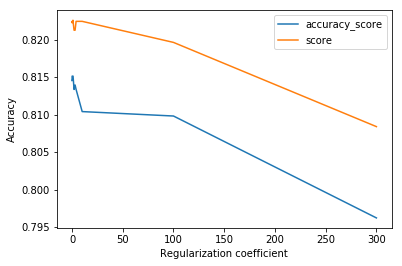

In [69]:
# PROBLEM 1, TASK 2 CODE GOES HERE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

print("Calculating...")
train_1= pd.read_csv("train_1.csv")
X_train,y_train= transformData(train_1)

valid_1= pd.read_csv("valid_1.csv")
X_valid,y_valid= transformData(valid_1)

test= pd.read_csv("test.csv")
X_test,y_test= transformData(test)

acc=[]
scores= []
scoresTest= []
testacc=[]
lamda=[.01,.03,.1,.2,.3,.4,.9,1,2,3,4,10,100,300]
#lamda= np.arange(1,100)
for i in lamda:
    reg = LogisticRegression(penalty='l2',C=1/i)
    reg.fit(X_train, y_train['yes'])
    score = reg.score(X_train,y_train)
    scores.append(score)
    y_pred = reg.predict(X_valid)
    acc.append(metrics.accuracy_score(y_valid, y_pred))
       
#print(scores)
plt.plot(lamda, acc ,label="accuracy_score")
plt.plot(lamda, scores, label="score")
plt.xlabel('Regularization coefficient')
plt.ylabel('Accuracy')
plt.legend()

#the best lamda value was lamda= 0.1,0.2,0.3,0.9
reg = LogisticRegression(penalty='l2',C=1/0.1)
reg.fit(X_train, y_train['yes'])
scoreTest = reg.score(X_test,y_test)
print("The accuracy of test.csv on model A for lamda=0.1 is :\n",scoreTest)
    

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Calculating...
The accuracy of test.csv on model A for lamda=0.2 is :
 0.894061705186332


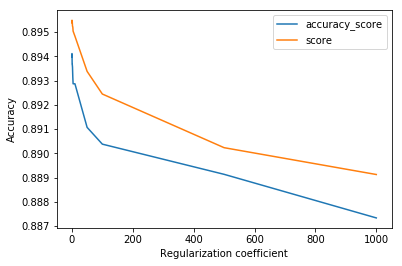

In [70]:
# PROBLEM 1, TASK 3 CODE GOES HERE

# PROBLEM 1, TASK 2 CODE GOES HERE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
print("Calculating...")
train_2= pd.read_csv("train_2.csv")
X_train,y_train= transformData(train_2)

valid_2= pd.read_csv("valid_2.csv")
X_valid,y_valid= transformData(valid_2)

acc=[]
scores= []
#lamda= np.arange(1,100)
lamda=[.1,.2,.3,.4,.9,1,2,3,4,10,50,100,500,1000]

for i in lamda:
    reg = LogisticRegression(penalty='l2',C=1/i)
    reg.fit(X_train, y_train['yes'])
    score = reg.score(X_train,y_train)
    scores.append(score)
    y_pred = reg.predict(X_valid)
    acc.append(metrics.accuracy_score(y_valid, y_pred))

#print(scores)
plt.plot(lamda, acc ,label="accuracy_score")
plt.plot(lamda, scores, label="score")
plt.xlabel('Regularization coefficient')
plt.ylabel('Accuracy')
plt.legend()

#the best lamda value was lamda= 0.4
reg = LogisticRegression(penalty='l2',C=1/0.4)
reg.fit(X_train, y_train['yes'])
scoreTest = reg.score(X_test,y_test)
print("The accuracy of test.csv on model A for lamda=0.2 is :\n",scoreTest)


### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

Calculating
The accuracy of test.csv on model A for lamda=0.4 is :
 0.8960521950680084


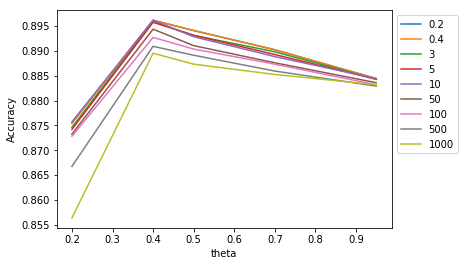

In [71]:
# PROBLEM 1, TASK 4 CODE GOES HERE

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
print("Calculating")
train_2= pd.read_csv("train_2.csv")
X_train,y_train= transformData(train_2)

valid_2= pd.read_csv("valid_2.csv")
X_valid,y_valid= transformData(valid_2)

scores= []
theeta=[.2,.4,.5,.7,.95]
acc=X_new = np.zeros(len(theeta))
#lamda= np.arange(1,100)
lamda=[.2,.4,3,5,10,50,100,500,1000]
for i in lamda:
    temp=[]
    reg = LogisticRegression(penalty='l2',C=1/i)
    reg.fit(X_train, y_train['yes'])   
    raw_prob=reg.predict_proba(X_valid)
    score = reg.score(X_train,y_train)
    scores.append(score)
    for y in theeta :
        for x in range(0,len(y_valid)):
            if(raw_prob[x][1] >y):
                y_pred[x]=1
            else:
                y_pred[x]=0
        temp.append(metrics.accuracy_score(y_valid, y_pred))
    plt.plot(theeta, temp ,label=i)
     
#print(scores)
plt.xlabel('theta')
plt.ylabel('Accuracy')
plt.legend( bbox_to_anchor=(1,1))

 #the best lamda value was lamda= 0.1,0.2,0.3,0.4 and theta=0.4
reg = LogisticRegression(penalty='l2',C=1/0.4)
reg.fit(X_train, y_train['yes'])
raw_prob=reg.predict_proba(X_test)
y_pred1=np.zeros(len(y_test))
for x in range(0,len(y_test)):
    if(raw_prob[x][1] >0.4):
        y_pred1[x]=1
    else:
        y_pred1[x]=0
accTest =metrics.accuracy_score(y_test, y_pred1)
    
                
print("The accuracy of test.csv on model A for lamda=0.4 is :\n",accTest)


### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.



In [72]:
#These values were found out from the respective model and shown here in the tabe format
pd.DataFrame( {'treshold':['0.5','0.5','0.4'],'lamda':['0.1','0.4','0.4'],'train.csv':['0.8222780322056433','0.8954862791179927','0.8954862791179927'],'valid.csv':['0.8151210868281158','0.8941111418302461','0.8961846834393143'],'test.csv':['0.7384717461019573','0.894061705186332','0.8963839433816212']},index = ['A', 'B','C'])


,treshold,lamda,train.csv,valid.csv,test.csv
A,0.5,0.1,0.8222780322056433,0.8151210868281158,0.7384717461019573
B,0.5,0.4,0.8954862791179927,0.8941111418302461,0.894061705186332
C,0.4,0.4,0.8954862791179927,0.8961846834393143,0.8963839433816212


1. <br>
a. In model A the data in trainig set is only 6770, so the accuracy of valid.csv and test.csv is low <br>
ab. In model B the data in training set is higher compared to the first one, so this model can predict better than the first one,hence the accuracy in this case is higher than that of modelA, further the accuracy of test and valid is comparable to that of train <br> 
c. In model C we find that for treshold=0.4 the model works the best and the accuracy increased for valid and test <br>

2. <br>
Yes, Since it is a logistic Regression, I think for this scenario it good  enough, because fom the accuracy matrix we get to know which value of hperparamaeter(C) gives the highest accuracy, we know that as the value of C increases the model will start overvfitting, so we calculate the value of C in different ranges and we check the accuracy for all the values. <br> We could also find which C gives the smallest difference between train and vaild accuracy and choose that C 

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

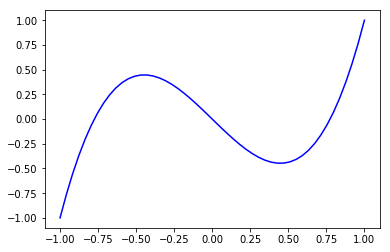

In [73]:
import numpy as np
from scipy.special import legendre
import matplotlib.pyplot as plt

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    X= np.linspace(low,high)
    Y=[]
    for i in range(0,len(X)):   
        y=0
        for j in range(0,len(w)):
            #print(w[j])
            y+=w[j]* X[i]**j
        Y.append(y)
    plt.figure()
    plt.plot(X,Y,"b")
        
    pass

## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
#visualize_function(4, -1, 1)
#visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [74]:
from sklearn.model_selection import train_test_split

def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
   # np.random.seed(123)
    w = get_coefficients(degree)
    X_train= np.random.uniform(-1,1,n_train)
    #X = np.zeros((n_train,len(w)))
    X_train.sort()
    y_train=[]
    
    X_test= np.random.uniform(-1,1,n_test)
    X_test.sort()
    y_test=[]
    Y=[]
    X =  np.random.uniform(-1,1,n_train+n_test)
        
    for i in range(0,len(X)):   
        y=0
        for j in range(0,len(w)):
            #print(w[j])
            y+=w[j]* X[i]**j + np.random.normal(0,sigma)
        Y.append(y)
   
    #print(len(X),len(Y))
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=n_test, random_state=69)
    
    return X_train, y_train, X_test, y_test
generate_dataset(3,75,25,.2)
print("Done")

Done


### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

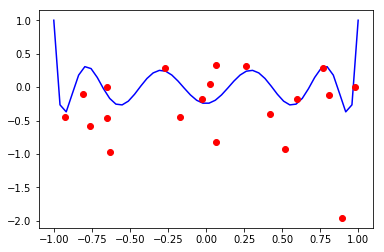

In [75]:
from numpy.polynomial import polynomial as P
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, y_train, X_test, y_test = generate_dataset(10,20,20,0.2)
#print(X_train)
#print(y_train)
visualize_function(10, -1, 1)
plt.plot(X_train,y_train,"ro")
X=X_train
X= X.reshape(-1,1)
#print(X)


In [76]:

poly = PolynomialFeatures(degree=2)
X_train_2= poly.fit_transform(X)
#print(X_train_2)
reg = LinearRegression().fit(X_train_2, y_train)
modelA_coef=reg.coef_
#print("coeff : \n\n ",modelA_coef)


poly = PolynomialFeatures(degree=10)
X_train_10= poly.fit_transform(X)
#print(X_train_2)
reg = LinearRegression().fit(X_train_10, y_train)
modelB_coef=reg.coef_

#print(modelA)
y_pred2_train=[]
y_pred10_train=[]
y_pred2_test=[]
y_pred10_test=[]
for i in range(0,len(X_train)):   
        y=0
        for j in range(0,len(modelA_coef)):
            y+=modelA_coef[j]* X_train[i]**j
        y_pred2_train.append(y)
#print(y_pred2_train)  

err2_train= mean_squared_error(y_train, y_pred2_train)
print("err2_train:",err2_train)

for i in range(0,len(X_test)):   
        y=0
        for j in range(0,len(modelA_coef)):
            y+=modelA_coef[j]* X_test[i]**j
        y_pred2_test.append(y)
        
err2_test= mean_squared_error(y_test, y_pred2_test)
print("err2_test:",err2_test)       

for i in range(0,len(X_train)):   
        y=0
        for j in range(0,len(modelB_coef)):
            y+=modelB_coef[j]* X_train[i]**j
        y_pred10_train.append(y)

err10_train= mean_squared_error(y_train, y_pred10_train)
print("err10_train:",err10_train) 

for i in range(0,len(X_test)):   
        y=0
        for j in range(0,len(modelB_coef)):
            y+=modelB_coef[j]* X_test[i]**j
        y_pred10_test.append(y)
        
err10_test= mean_squared_error(y_train, y_pred10_test)
print("err10_test:",err10_test)         



train = [err2_train,err10_train]
#test = [1,1]
test = [err2_test,err10_test]




err2_train: 0.29572109053619106
err2_test: 0.36416800442662883
err10_train: 0.16721197845609687
err10_test: 0.637599098536036


In [77]:
pd.DataFrame( {'train':[err2_train,err10_train],'test':[err2_test,err10_test]},index = ['Degree2', 'Degree10'])


,train,test
Degree2,0.295721,0.364168
Degree10,0.167212,0.637599


### Answer 5:
The results are as expected, <br>
We are generating a dataset of degree 10, so the degree 10 polynomial should fit better than degree 2. <br>
If we look at the above table we can see that the error in train set of degree 10 polynomial is less than that of degree 2 polynomial, this is as expected<br>
But the error in test set of degree 10 is more than than of degree 2, this is because we can say that the degree10 train set is overfitting the data(since both the dataset and train have degree 10 polynomial)

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

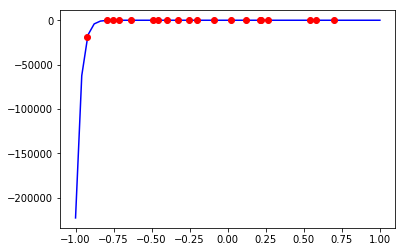

In [78]:
X_train, y_train, X_test, y_test = generate_dataset(45,20,20,0)
#print(X_train)
#print(y_train)
visualize_function(45, -1, 1)
plt.plot(X_train,y_train,"ro")
X=X_train
X= X.reshape(-1,1)


In [80]:

poly = PolynomialFeatures(degree=2)
X_train_2= poly.fit_transform(X)
#print(X_train_2)
reg = LinearRegression().fit(X_train_2, y_train)
modelA_coef=reg.coef_


poly = PolynomialFeatures(degree=10)
X_train_10= poly.fit_transform(X)
#print(X_train_2)
reg = LinearRegression().fit(X_train_10, y_train)
modelB_coef=reg.coef_

#print(modelB_coef)

y_pred2_train=[]
y_pred10_train=[]
y_pred2_test=[]
y_pred10_test=[]

y_pred2_train=np.dot(X_train_2,modelA_coef)
err2_train= mean_squared_error(y_train, y_pred2_train)
print("err2_train:",err2_train)

for i in range(0,len(X_test)):   
        y=0
        for j in range(0,len(modelA_coef)):
            y+=modelA_coef[j]* X_test[i]**j
        y_pred2_test.append(y)
        
err2_test= mean_squared_error(y_test, y_pred2_test)
print("err2_test:",err2_test)       


y_pred10_train=np.dot(X_train_10,modelB_coef)
err10_train= mean_squared_error(y_train, y_pred10_train)
print("err10_train:",err10_train) 

for i in range(0,len(X_test)):   
        y=0
        for j in range(0,len(modelB_coef)):
            y+=modelB_coef[j]* X_test[i]**j
        y_pred10_test.append(y)
        
err10_test= mean_squared_error(y_train, y_pred10_test)
print("err10_test:",err10_test)         

train = [err2_train,err10_train]
test = [err2_test,err10_test]



err2_train: 13035762.467645874
err2_test: 41978264.42002042
err10_train: 4301.077943411037
err10_test: 791124910.3959355


In [81]:
pd.DataFrame( {'train':[err2_train,err10_train],'test':[err2_test,err10_test]},index = ['Degree2', 'Degree10'])


,train,test
Degree2,1.303576e+07,4.197826e+07
Degree10,4.301078e+03,7.911249e+08


### Answer 5:
Since the target doesnt have noise, the blue line and red dots fit each other perfectly <br>
The results are not that suprising, since we are generating a dataset of degree 45, we can say that the degree 10 polynomial will be a better fit than the degree 2 polynomial, this is scene in the above table,
both the degrees will be an underfit for the model, but degree 10 is less underfit compared to degree 2 that is why we have less errors for degree 10 

From Below figures, note that degree 2 is a parabola while degree 10 is a wave.
So we can say that degree 10 will have a better chance than degree 2 to fit the data 

Text(0.5,1,'Degree10')

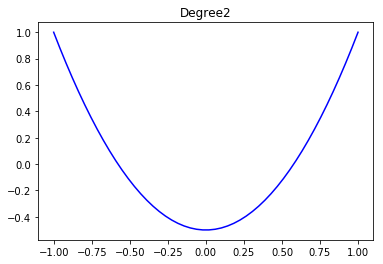

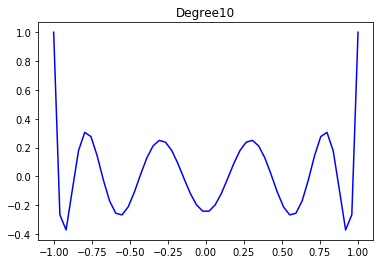

In [82]:

X_train, y_train, X_test, y_test = generate_dataset(45,20,20,0)

visualize_function(2, -1, 1)
#plt.plot(X_train,y_train,"ro")
plt.title('Degree2')

visualize_function(10, -1, 1)
#plt.plot(X_train,y_train,"go")
plt.title('Degree10')